In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [3]:
import matplotlib.pyplot as plt
import os
import glob
import skimage
from skimage import io, color
from skimage.feature.texture import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks

In [4]:
train_data=('/content/drive/MyDrive/CE784/train')

In [5]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from time import time
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
from time import sleep

In [6]:
categories = ['Non_raveling','Raveling']

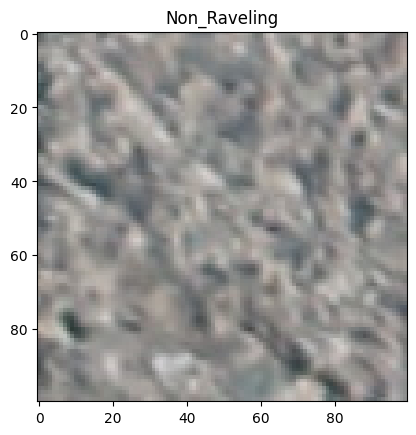

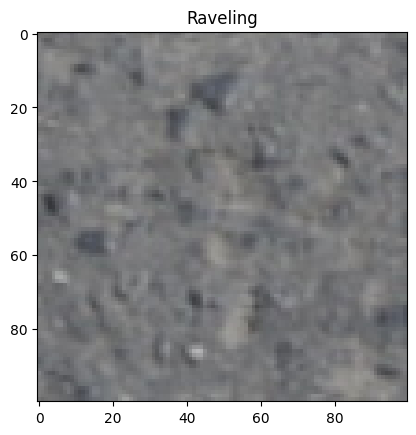

In [11]:
path1 = '/content/drive/MyDrive/CE784/train/Non_raveling/image4.jpg'
image = io.imread(path1)
figure, axis = plt.subplots()
axis.set_title('Non_Raveling')
axis.imshow(image)

path2= '/content/drive/MyDrive/CE784/train/Raveling/image2.jpg'
image = io.imread(path2)
figure, axis = plt.subplots()
axis.set_title('Raveling')
axis.imshow(image)

In [12]:
def trainFeatures(train_root, classes):

  train_dict = {}

  train_dict['entropy10'] = []
  train_dict['entropy50'] = []
  train_dict['entropy100'] = []
  train_dict['entropy150'] = []

  train_dict['contrast10'] = []
  train_dict['contrast50'] = []
  train_dict['contrast100'] = []
  train_dict['contrast150'] = []

  train_dict['asm10'] = []
  train_dict['asm50'] = []
  train_dict['asm100'] = []
  train_dict['asm150'] = []

  train_dict['corel10'] = []
  train_dict['corel50'] = []
  train_dict['corel100'] = []
  train_dict['corel150'] = []

  train_dict['entropy11'] = []
  train_dict['entropy51'] = []
  train_dict['entropy101'] = []
  train_dict['entropy151'] = []

  train_dict['contrast11'] = []
  train_dict['contrast51'] = []
  train_dict['contrast101'] = []
  train_dict['contrast151'] = []

  train_dict['asm11'] = []
  train_dict['asm51'] = []
  train_dict['asm101'] = []
  train_dict['asm151'] = []

  train_dict['corel11'] = []
  train_dict['corel51'] = []
  train_dict['corel101'] = []
  train_dict['corel151'] = []

  train_dict['entropy12'] = []
  train_dict['entropy52'] = []
  train_dict['entropy102'] = []
  train_dict['entropy152'] = []

  train_dict['contrast12'] = []
  train_dict['contrast52'] = []
  train_dict['contrast102'] = []
  train_dict['contrast152'] = []

  train_dict['asm12'] = []
  train_dict['asm52'] = []
  train_dict['asm102'] = []
  train_dict['asm152'] = []

  train_dict['corel12'] = []
  train_dict['corel52'] = []
  train_dict['corel102'] = []
  train_dict['corel152'] = []

  train_dict['entropy13'] = []
  train_dict['entropy53'] = []
  train_dict['entropy103'] = []
  train_dict['entropy153'] = []

  train_dict['contrast13'] = []
  train_dict['contrast53'] = []
  train_dict['contrast103'] = []
  train_dict['contrast153'] = []

  train_dict['asm13'] = []
  train_dict['asm53'] = []
  train_dict['asm103'] = []
  train_dict['asm153'] = []

  train_dict['corel13'] = []
  train_dict['corel53'] = []
  train_dict['corel103'] = []
  train_dict['corel153'] = []

  train_dict['b_mean'] = []
  train_dict['g_mean'] = []
  train_dict['r_mean'] = []

  train_dict['b_std'] = []
  train_dict['g_std'] = []
  train_dict['r_std'] = []

  train_dict['b_kurtosis'] = []
  train_dict['g_kurtosis'] = []
  train_dict['r_kurtosis'] = []

  train_dict['b_skew'] = []
  train_dict['g_skew'] = []
  train_dict['r_skew'] = []

  train_dict['labels'] = []

  for i in range(2):
    paths = os.path.join(train_root,classes[i],'*')
    paths = glob.glob(paths)

    for path in paths:
      img = cv2.imread(path)
      greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

      if(i==0):
        train_dict['labels'] .append(0)
      else:
        train_dict['labels'] .append(1)

      g10 = graycomatrix(greyImg, [1], [0])
      train_dict['entropy10'].append(skimage.measure.shannon_entropy(np.reshape(g10,(256,256))))
      train_dict['contrast10'].append(graycoprops(g10,'contrast')[0][0])
      train_dict['asm10'].append(graycoprops(g10,'ASM')[0][0])
      train_dict['corel10'].append(graycoprops(g10,'correlation')[0][0])

      g11 = graycomatrix(greyImg, [1], [np.pi/4])
      train_dict['entropy11'].append(skimage.measure.shannon_entropy(np.reshape(g11,(256,256))))
      train_dict['contrast11'].append(graycoprops(g11,'contrast')[0][0])
      train_dict['asm11'].append(graycoprops(g11,'ASM')[0][0])
      train_dict['corel11'].append(graycoprops(g11,'correlation')[0][0])

      g12 = graycomatrix(greyImg, [1], [np.pi/2])
      train_dict['entropy12'].append(skimage.measure.shannon_entropy(np.reshape(g12,(256,256))))
      train_dict['contrast12'].append(graycoprops(g12,'contrast')[0][0])
      train_dict['asm12'].append(graycoprops(g12,'ASM')[0][0])
      train_dict['corel12'].append(graycoprops(g12,'correlation')[0][0])

      g13 = graycomatrix(greyImg, [1], [3*np.pi/4])
      train_dict['entropy13'].append(skimage.measure.shannon_entropy(np.reshape(g13,(256,256))))
      train_dict['contrast13'].append(graycoprops(g13,'contrast')[0][0])
      train_dict['asm13'].append(graycoprops(g13,'ASM')[0][0])
      train_dict['corel13'].append(graycoprops(g13,'correlation')[0][0])

      g50 = graycomatrix(greyImg, [5], [0])
      train_dict['entropy50'].append(skimage.measure.shannon_entropy(np.reshape(g50,(256,256))))
      train_dict['contrast50'].append(graycoprops(g50,'contrast')[0][0])
      train_dict['asm50'].append(graycoprops(g50,'ASM')[0][0])
      train_dict['corel50'].append(graycoprops(g50,'correlation')[0][0])

      g51 = graycomatrix(greyImg, [5], [np.pi/4])
      train_dict['entropy51'].append(skimage.measure.shannon_entropy(np.reshape(g51,(256,256))))
      train_dict['contrast51'].append(graycoprops(g51,'contrast')[0][0])
      train_dict['asm51'].append(graycoprops(g51,'ASM')[0][0])
      train_dict['corel51'].append(graycoprops(g51,'correlation')[0][0])

      g52 = graycomatrix(greyImg, [5], [np.pi/2])
      train_dict['entropy52'].append(skimage.measure.shannon_entropy(np.reshape(g52,(256,256))))
      train_dict['contrast52'].append(graycoprops(g52,'contrast')[0][0])
      train_dict['asm52'].append(graycoprops(g52,'ASM')[0][0])
      train_dict['corel52'].append(graycoprops(g52,'correlation')[0][0])

      g53 = graycomatrix(greyImg, [5], [3*np.pi/4])
      train_dict['entropy53'].append(skimage.measure.shannon_entropy(np.reshape(g53,(256,256))))
      train_dict['contrast53'].append(graycoprops(g53,'contrast')[0][0])
      train_dict['asm53'].append(graycoprops(g53,'ASM')[0][0])
      train_dict['corel53'].append(graycoprops(g53,'correlation')[0][0])

      g100 = graycomatrix(greyImg, [10], [0])
      train_dict['entropy100'].append(skimage.measure.shannon_entropy(np.reshape(g100,(256,256))))
      train_dict['contrast100'].append(graycoprops(g100,'contrast')[0][0])
      train_dict['asm100'].append(graycoprops(g100,'ASM')[0][0])
      train_dict['corel100'].append(graycoprops(g100,'correlation')[0][0])

      g101 = graycomatrix(greyImg, [10], [np.pi/4])
      train_dict['entropy101'].append(skimage.measure.shannon_entropy(np.reshape(g101,(256,256))))
      train_dict['contrast101'].append(graycoprops(g101,'contrast')[0][0])
      train_dict['asm101'].append(graycoprops(g101,'ASM')[0][0])
      train_dict['corel101'].append(graycoprops(g101,'correlation')[0][0])

      g102 = graycomatrix(greyImg, [10], [np.pi/2])
      train_dict['entropy102'].append(skimage.measure.shannon_entropy(np.reshape(g102,(256,256))))
      train_dict['contrast102'].append(graycoprops(g102,'contrast')[0][0])
      train_dict['asm102'].append(graycoprops(g102,'ASM')[0][0])
      train_dict['corel102'].append(graycoprops(g102,'correlation')[0][0])

      g103 = graycomatrix(greyImg, [10], [3*np.pi/4])
      train_dict['entropy103'].append(skimage.measure.shannon_entropy(np.reshape(g103,(256,256))))
      train_dict['contrast103'].append(graycoprops(g103,'contrast')[0][0])
      train_dict['asm103'].append(graycoprops(g103,'ASM')[0][0])
      train_dict['corel103'].append(graycoprops(g103,'correlation')[0][0])

      g150 = graycomatrix(greyImg, [15], [0])
      train_dict['entropy150'].append(skimage.measure.shannon_entropy(np.reshape(g150,(256,256))))
      train_dict['contrast150'].append(graycoprops(g150,'contrast')[0][0])
      train_dict['asm150'].append(graycoprops(g150,'ASM')[0][0])
      train_dict['corel150'].append(graycoprops(g150,'correlation')[0][0])

      g151 = graycomatrix(greyImg, [15], [np.pi/4])
      train_dict['entropy151'].append(skimage.measure.shannon_entropy(np.reshape(g151,(256,256))))
      train_dict['contrast151'].append(graycoprops(g151,'contrast')[0][0])
      train_dict['asm151'].append(graycoprops(g151,'ASM')[0][0])
      train_dict['corel151'].append(graycoprops(g151,'correlation')[0][0])

      g152 = graycomatrix(greyImg, [15], [np.pi/2])
      train_dict['entropy152'].append(skimage.measure.shannon_entropy(np.reshape(g152,(256,256))))
      train_dict['contrast152'].append(graycoprops(g152,'contrast')[0][0])
      train_dict['asm152'].append(graycoprops(g152,'ASM')[0][0])
      train_dict['corel152'].append(graycoprops(g152,'correlation')[0][0])

      g153 = graycomatrix(greyImg, [15], [3*np.pi/4])
      train_dict['entropy153'].append(skimage.measure.shannon_entropy(np.reshape(g153,(256,256))))
      train_dict['contrast153'].append(graycoprops(g153,'contrast')[0][0])
      train_dict['asm153'].append(graycoprops(g153,'ASM')[0][0])
      train_dict['corel153'].append(graycoprops(g153,'correlation')[0][0])

      b = img[:,:,0]
      g = img[:,:,1]
      r = img[:,:,2]

      train_dict['b_mean'].append(np.mean(b))
      train_dict['g_mean'].append(np.mean(g))
      train_dict['r_mean'].append(np.mean(r))

      train_dict['b_std'].append(np.std(b))
      train_dict['g_std'].append(np.std(g))
      train_dict['r_std'].append(np.std(r))

      train_dict['b_kurtosis'].append(np.mean(kurtosis(b)))
      train_dict['g_kurtosis'].append(np.mean(kurtosis(g)))
      train_dict['r_kurtosis'].append(np.mean(kurtosis(r)))

      train_dict['b_skew'].append(np.mean(skew(b)))
      train_dict['g_skew'].append(np.mean(skew(g)))
      train_dict['r_skew'].append(np.mean(skew(r)))

  return train_dict

In [13]:
train_dataFrame = pd.DataFrame.from_dict(trainFeatures(train_data, categories))

In [14]:
train_dataFrame.head()

,entropy10,entropy50,entropy100,entropy150,contrast10,contrast50,contrast100,contrast150,asm10,asm50,...,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,labels
0,0.520238,0.600462,0.586832,0.565446,131.825657,1328.844000,2243.073444,2482.264706,0.000398,0.000211,...,36.366151,37.871355,37.825194,-0.225418,-0.345736,-0.365612,0.430271,0.432301,0.412744,0
1,0.424917,0.532169,0.532958,0.518998,90.316061,670.309263,959.285000,1067.520588,0.000597,0.000307,...,26.321702,27.010797,25.468583,0.745515,0.755690,0.610593,0.756919,0.825795,0.837623,0
2,0.244383,0.344497,0.353912,0.348859,18.614646,144.586421,212.896333,238.477294,0.002683,0.001183,...,17.985799,19.847288,22.440067,-0.932163,-0.968300,-1.077324,0.076673,0.077097,0.021983,0
3,0.169966,0.231035,0.237830,0.229529,10.162020,91.745053,133.761111,158.824471,0.008644,0.003652,...,10.250959,11.163726,12.570138,2.926026,3.153912,3.312226,1.205108,1.373873,1.430942,0
4,0.596244,0.621019,0.599970,0.576598,365.993131,2686.663895,3409.255778,3542.393647,0.000216,0.000159,...,34.500102,38.569254,41.123310,-0.642809,-0.665024,-0.666979,-0.065560,-0.108031,-0.159722,0


In [15]:
print(train_dataFrame)

     entropy10  entropy50  entropy100  entropy150  contrast10   contrast50  \
0     0.520238   0.600462    0.586832    0.565446  131.825657  1328.844000   
1     0.424917   0.532169    0.532958    0.518998   90.316061   670.309263   
2     0.244383   0.344497    0.353912    0.348859   18.614646   144.586421   
3     0.169966   0.231035    0.237830    0.229529   10.162020    91.745053   
4     0.596244   0.621019    0.599970    0.576598  365.993131  2686.663895   
..         ...        ...         ...         ...         ...          ...   
695   0.510102   0.603122    0.588728    0.567894  135.877778  1222.466000   
696   0.405315   0.534897    0.541691    0.523276   50.955354   486.995789   
697   0.485346   0.600355    0.590703    0.572205   72.568182   942.893053   
698   0.591529   0.622595    0.601975    0.578607  315.263636  2134.337053   
699   0.422452   0.526825    0.519743    0.505984   92.924545   660.378632   

     contrast100  contrast150     asm10     asm50  ...      b_s

In [16]:
X_train = train_dataFrame.drop('labels', axis=1)
Y_train = train_dataFrame.labels

In [17]:
input_shape = [X_train.shape[1]]
print(input_shape)

[76]


In [18]:
model = keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape = input_shape))

model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(8,activation = 'sigmoid'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=['accuracy'])
History=model.fit(X_train,Y_train,batch_size = 20,epochs = 500)

Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9511 - loss: 0.1236
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9511 - loss: 0.1296
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9496 - loss: 0.1511
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9652 - loss: 0.1085
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9389 - loss: 0.1765
Epoch 6/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1368
Epoch 7/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1748
Epoch 8/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9380 - loss: 0.1441
Epoch 9/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.0885
Epoch 10/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9335 - loss: 0.1734
Epoch 11/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9462 - loss: 0.1312
Epoch 12/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

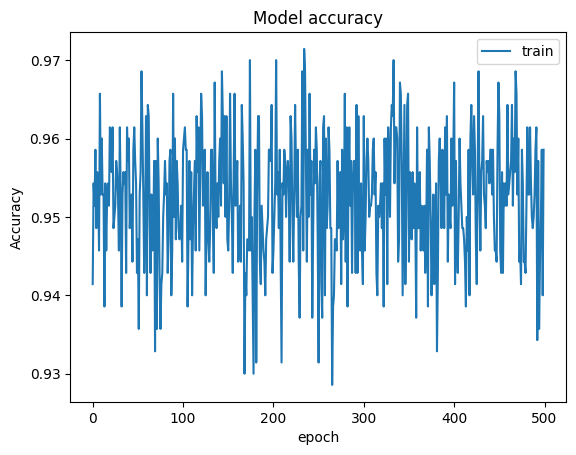

In [21]:
plt.plot(History.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

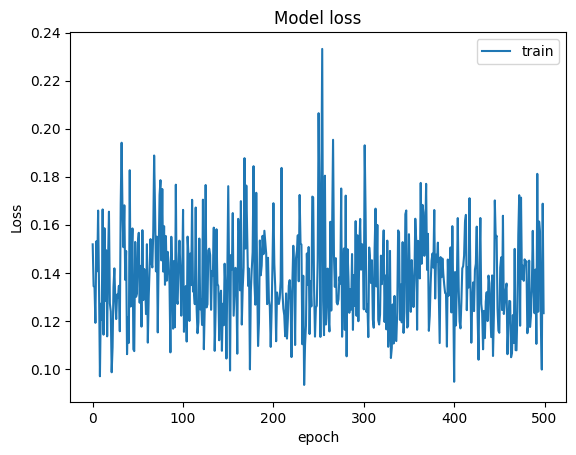

In [22]:
plt.plot(History.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

In [23]:
test_data= '/content/drive/MyDrive/CE784/test'

In [24]:
def testFeatures(test_path):

  test_dict = {}

  test_dict['entropy10'] = []
  test_dict['entropy50'] = []
  test_dict['entropy100'] = []
  test_dict['entropy150'] = []

  test_dict['contrast10'] = []
  test_dict['contrast50'] = []
  test_dict['contrast100'] = []
  test_dict['contrast150'] = []

  test_dict['asm10'] = []
  test_dict['asm50'] = []
  test_dict['asm100'] = []
  test_dict['asm150'] = []

  test_dict['corel10'] = []
  test_dict['corel50'] = []
  test_dict['corel100'] = []
  test_dict['corel150'] = []

  test_dict['entropy11'] = []
  test_dict['entropy51'] = []
  test_dict['entropy101'] = []
  test_dict['entropy151'] = []

  test_dict['contrast11'] = []
  test_dict['contrast51'] = []
  test_dict['contrast101'] = []
  test_dict['contrast151'] = []

  test_dict['asm11'] = []
  test_dict['asm51'] = []
  test_dict['asm101'] = []
  test_dict['asm151'] = []

  test_dict['corel11'] = []
  test_dict['corel51'] = []
  test_dict['corel101'] = []
  test_dict['corel151'] = []

  test_dict['entropy12'] = []
  test_dict['entropy52'] = []
  test_dict['entropy102'] = []
  test_dict['entropy152'] = []

  test_dict['contrast12'] = []
  test_dict['contrast52'] = []
  test_dict['contrast102'] = []
  test_dict['contrast152'] = []

  test_dict['asm12'] = []
  test_dict['asm52'] = []
  test_dict['asm102'] = []
  test_dict['asm152'] = []

  test_dict['corel12'] = []
  test_dict['corel52'] = []
  test_dict['corel102'] = []
  test_dict['corel152'] = []

  test_dict['entropy13'] = []
  test_dict['entropy53'] = []
  test_dict['entropy103'] = []
  test_dict['entropy153'] = []

  test_dict['contrast13'] = []
  test_dict['contrast53'] = []
  test_dict['contrast103'] = []
  test_dict['contrast153'] = []

  test_dict['asm13'] = []
  test_dict['asm53'] = []
  test_dict['asm103'] = []
  test_dict['asm153'] = []

  test_dict['corel13'] = []
  test_dict['corel53'] = []
  test_dict['corel103'] = []
  test_dict['corel153'] = []

  test_dict['b_mean'] = []
  test_dict['g_mean'] = []
  test_dict['r_mean'] = []

  test_dict['b_std'] = []
  test_dict['g_std'] = []
  test_dict['r_std'] = []

  test_dict['b_kurtosis'] = []
  test_dict['g_kurtosis'] = []
  test_dict['r_kurtosis'] = []

  test_dict['b_skew'] = []
  test_dict['g_skew'] = []
  test_dict['r_skew'] = []

  test_dict['filename'] = []



  for image in os.listdir(test_path):
    path = os.path.join(test_path, image)
    img = cv2.imread(path)
    greyImg = cv2.imread(path,cv2.IMREAD_GRAYSCALE)



    g10 = graycomatrix(greyImg, [1], [0])
    test_dict['entropy10'].append(skimage.measure.shannon_entropy(np.reshape(g10,(256,256))))
    test_dict['contrast10'].append(graycoprops(g10,'contrast')[0][0])
    test_dict['asm10'].append(graycoprops(g10,'ASM')[0][0])
    test_dict['corel10'].append(graycoprops(g10,'correlation')[0][0])

    g11 = graycomatrix(greyImg, [1], [np.pi/4])
    test_dict['entropy11'].append(skimage.measure.shannon_entropy(np.reshape(g11,(256,256))))
    test_dict['contrast11'].append(graycoprops(g11,'contrast')[0][0])
    test_dict['asm11'].append(graycoprops(g11,'ASM')[0][0])
    test_dict['corel11'].append(graycoprops(g11,'correlation')[0][0])

    g12 = graycomatrix(greyImg, [1], [np.pi/2])
    test_dict['entropy12'].append(skimage.measure.shannon_entropy(np.reshape(g12,(256,256))))
    test_dict['contrast12'].append(graycoprops(g12,'contrast')[0][0])
    test_dict['asm12'].append(graycoprops(g12,'ASM')[0][0])
    test_dict['corel12'].append(graycoprops(g12,'correlation')[0][0])

    g13 = graycomatrix(greyImg, [1], [3*np.pi/4])
    test_dict['entropy13'].append(skimage.measure.shannon_entropy(np.reshape(g13,(256,256))))
    test_dict['contrast13'].append(graycoprops(g13,'contrast')[0][0])
    test_dict['asm13'].append(graycoprops(g13,'ASM')[0][0])
    test_dict['corel13'].append(graycoprops(g13,'correlation')[0][0])

    g50 = graycomatrix(greyImg, [5], [0])
    test_dict['entropy50'].append(skimage.measure.shannon_entropy(np.reshape(g50,(256,256))))
    test_dict['contrast50'].append(graycoprops(g50,'contrast')[0][0])
    test_dict['asm50'].append(graycoprops(g50,'ASM')[0][0])
    test_dict['corel50'].append(graycoprops(g50,'correlation')[0][0])

    g51 = graycomatrix(greyImg, [5], [np.pi/4])
    test_dict['entropy51'].append(skimage.measure.shannon_entropy(np.reshape(g51,(256,256))))
    test_dict['contrast51'].append(graycoprops(g51,'contrast')[0][0])
    test_dict['asm51'].append(graycoprops(g51,'ASM')[0][0])
    test_dict['corel51'].append(graycoprops(g51,'correlation')[0][0])

    g52 = graycomatrix(greyImg, [5], [np.pi/2])
    test_dict['entropy52'].append(skimage.measure.shannon_entropy(np.reshape(g52,(256,256))))
    test_dict['contrast52'].append(graycoprops(g52,'contrast')[0][0])
    test_dict['asm52'].append(graycoprops(g52,'ASM')[0][0])
    test_dict['corel52'].append(graycoprops(g52,'correlation')[0][0])

    g53 = graycomatrix(greyImg, [5], [3*np.pi/4])
    test_dict['entropy53'].append(skimage.measure.shannon_entropy(np.reshape(g53,(256,256))))
    test_dict['contrast53'].append(graycoprops(g53,'contrast')[0][0])
    test_dict['asm53'].append(graycoprops(g53,'ASM')[0][0])
    test_dict['corel53'].append(graycoprops(g53,'correlation')[0][0])

    g100 = graycomatrix(greyImg, [10], [0])
    test_dict['entropy100'].append(skimage.measure.shannon_entropy(np.reshape(g100,(256,256))))
    test_dict['contrast100'].append(graycoprops(g100,'contrast')[0][0])
    test_dict['asm100'].append(graycoprops(g100,'ASM')[0][0])
    test_dict['corel100'].append(graycoprops(g100,'correlation')[0][0])

    g101 = graycomatrix(greyImg, [10], [np.pi/4])
    test_dict['entropy101'].append(skimage.measure.shannon_entropy(np.reshape(g101,(256,256))))
    test_dict['contrast101'].append(graycoprops(g101,'contrast')[0][0])
    test_dict['asm101'].append(graycoprops(g101,'ASM')[0][0])
    test_dict['corel101'].append(graycoprops(g101,'correlation')[0][0])

    g102 = graycomatrix(greyImg, [10], [np.pi/2])
    test_dict['entropy102'].append(skimage.measure.shannon_entropy(np.reshape(g102,(256,256))))
    test_dict['contrast102'].append(graycoprops(g102,'contrast')[0][0])
    test_dict['asm102'].append(graycoprops(g102,'ASM')[0][0])
    test_dict['corel102'].append(graycoprops(g102,'correlation')[0][0])

    g103 = graycomatrix(greyImg, [10], [3*np.pi/4])
    test_dict['entropy103'].append(skimage.measure.shannon_entropy(np.reshape(g103,(256,256))))
    test_dict['contrast103'].append(graycoprops(g103,'contrast')[0][0])
    test_dict['asm103'].append(graycoprops(g103,'ASM')[0][0])
    test_dict['corel103'].append(graycoprops(g103,'correlation')[0][0])

    g150 = graycomatrix(greyImg, [15], [0])
    test_dict['entropy150'].append(skimage.measure.shannon_entropy(np.reshape(g150,(256,256))))
    test_dict['contrast150'].append(graycoprops(g150,'contrast')[0][0])
    test_dict['asm150'].append(graycoprops(g150,'ASM')[0][0])
    test_dict['corel150'].append(graycoprops(g150,'correlation')[0][0])

    g151 = graycomatrix(greyImg, [15], [np.pi/4])
    test_dict['entropy151'].append(skimage.measure.shannon_entropy(np.reshape(g151,(256,256))))
    test_dict['contrast151'].append(graycoprops(g151,'contrast')[0][0])
    test_dict['asm151'].append(graycoprops(g151,'ASM')[0][0])
    test_dict['corel151'].append(graycoprops(g151,'correlation')[0][0])

    g152 = graycomatrix(greyImg, [15], [np.pi/2])
    test_dict['entropy152'].append(skimage.measure.shannon_entropy(np.reshape(g152,(256,256))))
    test_dict['contrast152'].append(graycoprops(g152,'contrast')[0][0])
    test_dict['asm152'].append(graycoprops(g152,'ASM')[0][0])
    test_dict['corel152'].append(graycoprops(g152,'correlation')[0][0])

    g153 = graycomatrix(greyImg, [15], [3*np.pi/4])
    test_dict['entropy153'].append(skimage.measure.shannon_entropy(np.reshape(g153,(256,256))))
    test_dict['contrast153'].append(graycoprops(g153,'contrast')[0][0])
    test_dict['asm153'].append(graycoprops(g153,'ASM')[0][0])
    test_dict['corel153'].append(graycoprops(g153,'correlation')[0][0])

    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]

    test_dict['b_mean'].append(np.mean(b))
    test_dict['g_mean'].append(np.mean(g))
    test_dict['r_mean'].append(np.mean(r))

    test_dict['b_std'].append(np.std(b))
    test_dict['g_std'].append(np.std(g))
    test_dict['r_std'].append(np.std(r))

    test_dict['b_kurtosis'].append(np.mean(kurtosis(b)))
    test_dict['g_kurtosis'].append(np.mean(kurtosis(g)))
    test_dict['r_kurtosis'].append(np.mean(kurtosis(r)))

    test_dict['b_skew'].append(np.mean(skew(b)))
    test_dict['g_skew'].append(np.mean(skew(g)))
    test_dict['r_skew'].append(np.mean(skew(r)))

    test_dict['filename'].append(image)
  return test_dict

In [25]:
test_dataFrame = pd.DataFrame.from_dict(testFeatures(test_data))

In [26]:
test_dataFrame.head()

,entropy10,entropy50,entropy100,entropy150,contrast10,contrast50,contrast100,contrast150,asm10,asm50,...,b_std,g_std,r_std,b_kurtosis,g_kurtosis,r_kurtosis,b_skew,g_skew,r_skew,filename
0,0.398813,0.489059,0.489458,0.473114,107.223333,764.644737,1022.054889,1130.019529,0.001663,0.000664,...,19.357057,23.542729,28.097595,0.895915,2.365585,2.567930,0.445887,1.021692,1.194160,115.jpg
1,0.409692,0.538267,0.535841,0.515952,60.416566,641.174316,1086.821556,1165.319412,0.000698,0.000311,...,23.722544,25.930172,27.301819,0.678362,0.620934,0.512525,0.817917,0.855101,0.825137,114.jpg
2,0.534666,0.603752,0.583880,0.561234,176.427273,1439.391053,1677.781000,1662.168118,0.000314,0.000192,...,28.914643,32.490648,36.857975,-0.109279,-0.498473,-0.784308,0.348062,0.258886,0.156802,11.jpg
3,0.559204,0.591891,0.574503,0.554944,338.784242,1561.848737,1620.556222,1649.234941,0.000269,0.000208,...,26.902633,28.735953,29.799302,-0.166052,-0.234835,-0.277919,0.152609,0.117662,0.061509,112.jpg
4,0.600307,0.624355,0.602622,0.578704,348.602121,2521.009368,3317.730000,3376.878706,0.000211,0.000150,...,39.117216,41.689743,43.665437,-0.626072,-0.654639,-0.656048,-0.228972,-0.222054,-0.223115,108.jpg


In [27]:
print(test_dataFrame)

     entropy10  entropy50  entropy100  entropy150  contrast10   contrast50  \
0     0.398813   0.489059    0.489458    0.473114  107.223333   764.644737   
1     0.409692   0.538267    0.535841    0.515952   60.416566   641.174316   
2     0.534666   0.603752    0.583880    0.561234  176.427273  1439.391053   
3     0.559204   0.591891    0.574503    0.554944  338.784242  1561.848737   
4     0.600307   0.624355    0.602622    0.578704  348.602121  2521.009368   
..         ...        ...         ...         ...         ...          ...   
295   0.407204   0.515533    0.508094    0.495410   83.058283   591.685684   
296   0.481091   0.583214    0.578575    0.560180   94.251010   858.140947   
297   0.441004   0.577603    0.583358    0.566075   60.549697   841.599263   
298   0.430561   0.551445    0.548247    0.531876   74.863434   717.762316   
299   0.457586   0.586411    0.579836    0.557500   75.570303  1026.731474   

     contrast100  contrast150     asm10     asm50  ...      b_s

In [28]:
X_test = test_dataFrame.drop(['filename'], axis = 1)

In [29]:
Y_test=model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [30]:
classes = []
for pred in Y_test:
  if(pred < 0.5): classes.append('Non_raveling')
  else: classes.append('Raveling')

In [31]:
test_dataFrame['class'] = classes

In [32]:
sub_dataframe = test_dataFrame[['filename','class']]

In [33]:
sub_dataframe.head()

,filename,class
0,115.jpg,Raveling
1,114.jpg,Raveling
2,11.jpg,Non_raveling
3,112.jpg,Non_raveling
4,108.jpg,Raveling


In [36]:
from google.colab import files
sub_dataframe.to_csv('submissionF.csv', index = False) # Added .csv extension to filename
files.download('submissionF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
Y_test.shape

(300, 1)